In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point, labs, scale_color_brewer, scale_color_distiller, scale_fill_gradient, theme, element_text, ggsave, coord_cartesian
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBRegressor

import Functions

In [12]:
train_size = 0.75
val_size = 0.10
test_size = 0.15

y_train, y_val, y_test, X_train, X_val, X_test = Functions.getSplittedData(['Charge', 'Mass', 'NumAtoms', 'FractionSP3', 'NumRotatableBonds', 'Length'], train_size, val_size, test_size)
features = ['Charge', 'Mass']

print(X_train['Charge'].unique())
print(X_train['Mass'].unique().__len__())

[0.33333333 0.         0.66666667 1.        ]
70511


In [13]:
svr1 = SVR(kernel='linear', C=1, epsilon=0.1)
svr1.fit(X_train[features], y_train.ravel())
y_pred = svr1.predict(X_val[features])
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.0021014093679942096
Mean Absolute Error: 0.039942843250590616
R² Score: 0.9446466095757472


In [15]:
svr2 = SVR(kernel='linear')
param_grid = {'C': [1,2,3,4,5,6],
              'epsilon': [0.025, 0.05, 0.1]}
search = HalvingGridSearchCV(svr2, param_grid, cv=5, scoring='r2', random_state=42)
search.fit(X_train[features], y_train.ravel())
print(search.best_params_)


C:\Users\samue\PycharmProjects\PBL_Ion_Mobility\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast


{'C': 3, 'epsilon': 0.025}


In [16]:
y_pred_fin = search.best_estimator_.predict(X_test[features])
mse_fin = mean_squared_error(y_test, y_pred_fin)
mae_fin = mean_absolute_error(y_test, y_pred_fin)
r2_fin = r2_score(y_test, y_pred_fin)

print(f"Mean Squared Error: {mse_fin}")
print(f"Mean Absolute Error: {mae_fin}")
print(f"R² Score: {r2_fin}")

Mean Squared Error: 0.0006976604417349916
Mean Absolute Error: 0.01977910338605613
R² Score: 0.9816816067923775


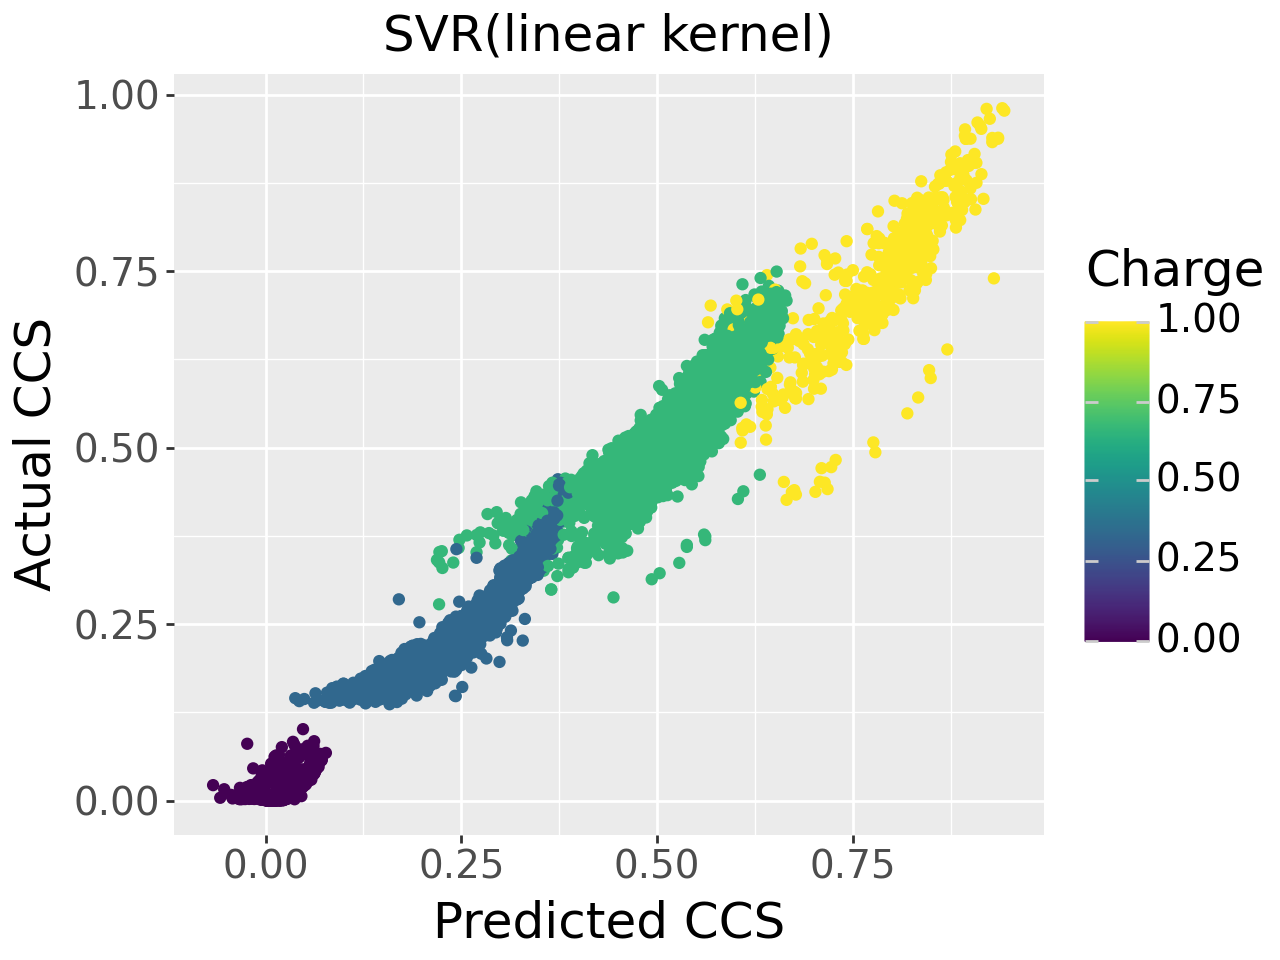

In [18]:

df= pd.DataFrame()
df['Charge'] = X_test['Charge']
df['CCS_pred'] = y_pred_fin
df['CCS_actual'] = y_test
plot1 = (
    ggplot(df, aes(x = "CCS_pred", y = "CCS_actual", color="Charge"))
    +  labs(y = "Actual CCS", x = "Predicted CCS", title="SVR(linear kernel)")
    + geom_point() 
    + theme(
        plot_title=element_text(size=18),         # Schriftgröße des Titels
        axis_title_x=element_text(size=18),       # Schriftgröße der X-Achsenbeschriftung
        axis_title_y=element_text(size=18),       # Schriftgröße der Y-Achsenbeschriftung
        legend_title=element_text(size=18), 
        axis_text_x=element_text(size=14),        # X-axis tick label font size
        axis_text_y=element_text(size=14), # Schriftgröße des Legendentitels
        legend_text=element_text(size=14)         # Schriftgröße des Legendentextes
    )
)
#plot1.save(filename='SVR_linear.png', dpi=300)
plot1.show()

In [41]:
rbf = SVR(kernel='rbf', gamma='auto', C=1, epsilon=0.1)
rbf.fit(X_train, y_train.ravel())

y_pred_rbf1 = rbf.predict(X_val)
mse_rb = mean_squared_error(y_val, y_pred_rbf1)
mae_rb = mean_absolute_error(y_val, y_pred_rbf1)
r2_rb = r2_score(y_val, y_pred_rbf1)

print(f"Mean Squared Error: {mse_rb}")
print(f"Mean Absolute Error: {mae_rb}")
print(f"R² Score: {r2_rb}")

In [82]:
rbf_fin = SVR(kernel='rbf')
param_grid2 = {
    'gamma': ['auto', 'scale'],
    'C': [2,3,4,5],
    'epsilon': [0.05,0.1, 0.15]
}
search2 = HalvingGridSearchCV(rbf_fin, param_grid2, cv=5, scoring='r2', random_state=42)
search2.fit(X_train[features], y_train.ravel())
search2.best_params_

C:\Users\samue\PycharmProjects\PBL_Ion_Mobility\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
C:\Users\samue\PycharmProjects\PBL_Ion_Mobility\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast


{'C': 4, 'epsilon': 0.05, 'gamma': 'auto'}

Mean Squared Error: 0.000657710892813977
Mean Absolute Error: 0.0195665700821942
R² Score: 0.982730557688579


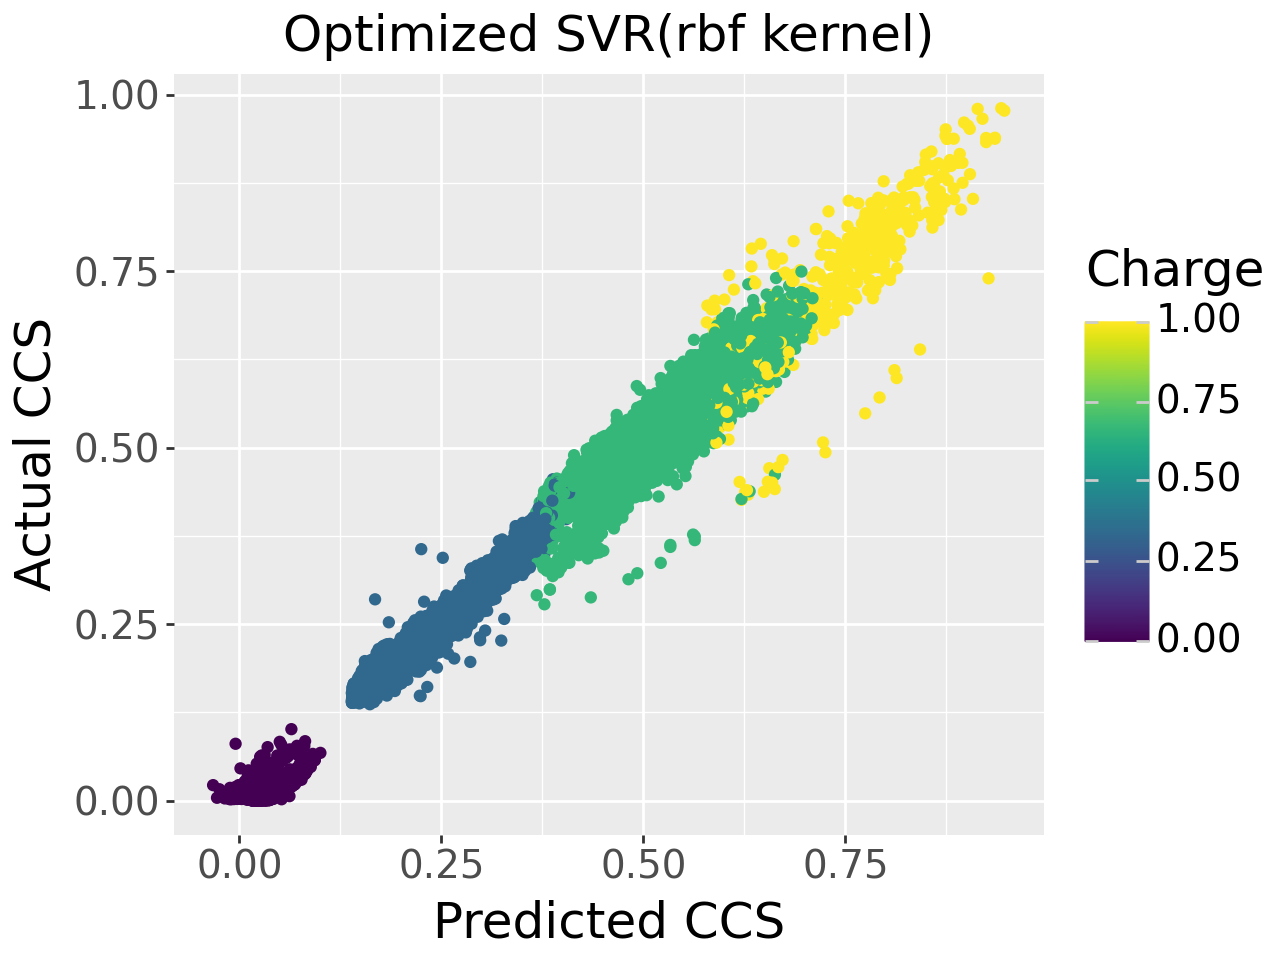

In [84]:
y_pred_fin2 = search2.best_estimator_.predict(X_test[features])
mse_fin2 = mean_squared_error(y_test, y_pred_fin2)
mae_fin2 = mean_absolute_error(y_test, y_pred_fin2)
r2_fin2 = r2_score(y_test, y_pred_fin2)

print(f"Mean Squared Error: {mse_fin2}")
print(f"Mean Absolute Error: {mae_fin2}")
print(f"R² Score: {r2_fin2}")
df= pd.DataFrame()
df['Charge'] = X_test['Charge']
df['FractionSP3'] = X_test['FractionSP3']
df['CCS_pred'] = y_pred_fin2
df['CCS_actual'] = y_test
plot2 = (
    ggplot(df, aes(x = "CCS_pred", y = "CCS_actual", color="Charge"))
    +  labs(y = "Actual CCS", x = "Predicted CCS", title="Optimized SVR(rbf kernel)")
    + geom_point() 
    + theme(
        plot_title=element_text(size=18),         # Schriftgröße des Titels
        axis_title_x=element_text(size=18),       # Schriftgröße der X-Achsenbeschriftung
        axis_title_y=element_text(size=18),       # Schriftgröße der Y-Achsenbeschriftung
        legend_title=element_text(size=18), 
        axis_text_x=element_text(size=14),        # X-axis tick label font size
        axis_text_y=element_text(size=14), # Schriftgröße des Legendentitels
        legend_text=element_text(size=14)         # Schriftgröße des Legendentextes
    )
)
plot2.save(filename='SVR_rbf.png', dpi=300)
plot2.show()

21613
Percentage of data with deviation > 20%: 24.91%
Max Deviation: [17280.2]%
True Value (Max Deviation): [0.00015489]
Predicted Value (Max Deviation): 0.026922244572105902
Index of Max Deviation: 11878
Min Deviation: [-771.7]%
True Value (Min Deviation): [0.0041244]
Predicted Value (Min Deviation): -0.027703847492578926
Index of Min Deviation: 11536


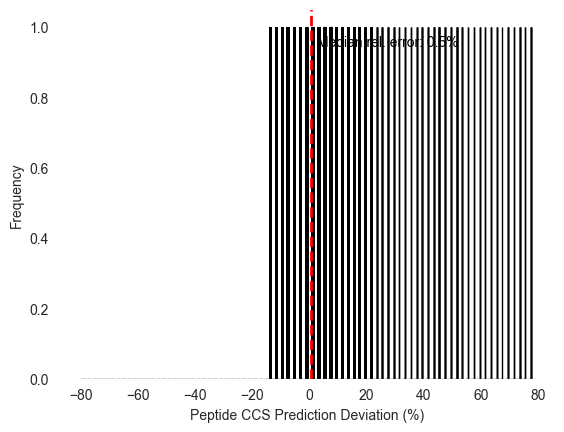

In [8]:
# Example data (replace with actual data)
predictions = y_pred_fin2
true_values= y_test
print(len(true_values))

# Compute deviations
deviation = [(b - a) / (a + 1e-8) * 100 for a, b in zip(true_values, predictions)]

# Round deviations
deviation_percentage_rounded = np.round(deviation, 1)

deviations_above_20 = sum(1 for d in deviation_percentage_rounded if abs(d) > 20)

# Calculate the percentage of data with deviation higher than 50%
percentage_above_20 = (deviations_above_20 / len(deviation_percentage_rounded)) * 100

print(f"Percentage of data with deviation > 20%: {percentage_above_20:.2f}%")

max_deviation_idx = np.argmax(deviation_percentage_rounded)
min_deviation_idx = np.argmin(deviation_percentage_rounded)
# Print summary
print(f"Max Deviation: {deviation_percentage_rounded[max_deviation_idx]}%")
print(f"True Value (Max Deviation): {true_values[max_deviation_idx]}")
print(f"Predicted Value (Max Deviation): {predictions[max_deviation_idx]}")
print(f"Index of Max Deviation: {max_deviation_idx}")

print(f"Min Deviation: {deviation_percentage_rounded[min_deviation_idx]}%")
print(f"True Value (Min Deviation): {true_values[min_deviation_idx]}")
print(f"Predicted Value (Min Deviation): {predictions[min_deviation_idx]}")
print(f"Index of Min Deviation: {min_deviation_idx}")


sorted_deviations = sorted(deviation_percentage_rounded)

# Calculate the index for the 5% threshold
lower_5_percent_index = int(len(sorted_deviations) * 0.01)
upper_5_percent_index = int(len(sorted_deviations) * 0.99)

# Filter out the top and bottom 5% of the data
filtered_deviations = sorted_deviations[lower_5_percent_index:upper_5_percent_index]
median_error = np.median(sorted_deviations)
# Plot the histogram with the filtered data
plt.hist(filtered_deviations, bins=np.arange(-80, 80, 2), edgecolor='black')

plt.axvline(median_error, color='red', linestyle='dashed', linewidth=2, label=f'Median Error: {median_error:.1f}%')

# Annotate the median value with the text "Median Error: {median_error}"
plt.text(median_error + 2, plt.ylim()[1] * 0.9, f'Median rel. error: {median_error:.1f}%', color='black', fontsize=10)

ax = plt.gca()  # Get the current axes
ax.set_facecolor("white")
# Labels and title
plt.xlabel('Peptide CCS Prediction Deviation (%)')
plt.ylabel('Frequency')

# Show plot
plt.savefig('SVR deviation plot.png')
plt.show()


In [19]:
mfin = SVR(kernel='rbf', gamma='auto', C=4, epsilon=0.05)
mfin.fit(X_train[features], y_train.ravel())
y_predfin = mfin.predict(X_test[features])
mse = mean_squared_error(y_test, y_predfin)
print(f'MSE: {mse}')

MSE: 0.000657710892813977
